In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
#sklearn preprocessing, metrics, cross validations, encodings
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics, preprocessing
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV,StratifiedShuffleSplit,RandomizedSearchCV
from sklearn import metrics
#models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
#visualization and warnings
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
%matplotlib inline
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from e.g. seaborn)
sns.set_style('darkgrid')
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x)) 

In [2]:
train_df = pd.read_csv(r"/Users/priyankaluthra/Desktop/housePriceKaggle/train.csv")
test_df = pd.read_csv(r"/Users/priyankaluthra/Desktop/housePriceKaggle/test.csv")

In [3]:
train_df.shape

(29451, 12)

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [5]:
train_df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.00,29451.00,29451.00,29451.00,29451.00,29451.00,29451.00,29451.00,29451.00
mean,0.18,0.32,2.39,19802.17,0.82,0.93,21.30,76.84,142.90
std,0.38,0.47,0.88,1901334.91,0.38,0.26,6.21,10.56,656.88
min,0.00,0.00,1.00,3.00,0.00,0.00,-37.71,-121.76,0.25
25%,0.00,0.00,2.00,900.02,1.00,1.00,18.45,73.80,38.00
50%,0.00,0.00,2.00,1175.06,1.00,1.00,20.75,77.32,62.00
75%,0.00,1.00,3.00,1550.69,1.00,1.00,26.90,77.83,100.00
max,1.00,1.00,20.00,254545454.50,1.00,1.00,59.91,152.96,30000.00


In [6]:
#check for missing data
missing_train = train_df.isnull().sum().sort_values(ascending = False)
missing_train

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [7]:
#get numerical and categorical features (inc target in numerical data for now)
numerical_feats = train_df.dtypes[train_df.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = train_df.dtypes[train_df.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

print(train_df[numerical_feats].columns)
print("*"*100)
print(train_df[categorical_feats].columns)

Number of Numerical features:  9
Number of Categorical features:  3
Index(['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'SQUARE_FT', 'READY_TO_MOVE',
       'RESALE', 'LONGITUDE', 'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')
****************************************************************************************************
Index(['POSTED_BY', 'BHK_OR_RK', 'ADDRESS'], dtype='object')


In [8]:
def getDistributionPlots(colName):
    (mu, sigma) = norm.fit(train_df[colName])
    (skew, kurt) = train_df[colName].skew(),train_df[colName].kurt()
    print( '\n mu = {:.2f} and sigma = {:.2f} and skew = {:05.2f} and kurt = {:05.2f}\n'.format(mu, sigma, skew, kurt))
    sns.distplot(train_df[colName] , fit=norm)
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
                loc='best')
    plt.ylabel('Frequency')
    plt.title(colName + 'distribution')
    plt.show()

UNDER_CONSTRUCTION

 mu = 0.18 and sigma = 0.38 and skew = 01.67 and kurt = 00.78



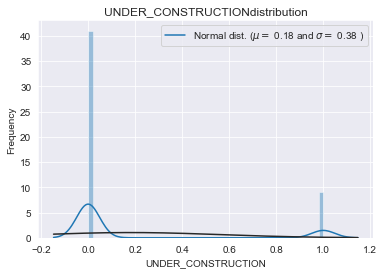

RERA

 mu = 0.32 and sigma = 0.47 and skew = 00.78 and kurt = -1.39



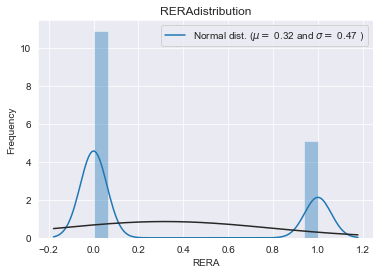

BHK_NO.

 mu = 2.39 and sigma = 0.88 and skew = 02.39 and kurt = 34.14



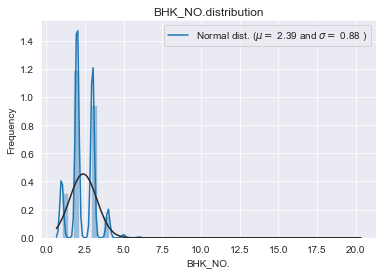

SQUARE_FT

 mu = 19802.17 and sigma = 1901302.63 and skew = 116.61 and kurt = 14224.18



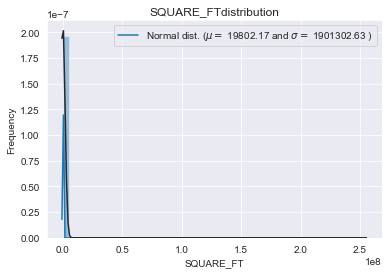

READY_TO_MOVE

 mu = 0.82 and sigma = 0.38 and skew = -1.67 and kurt = 00.78



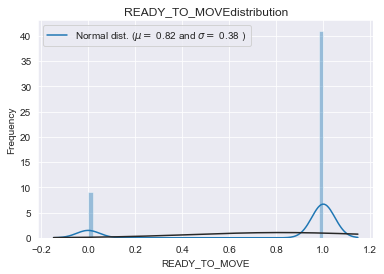

RESALE

 mu = 0.93 and sigma = 0.26 and skew = -3.36 and kurt = 09.28



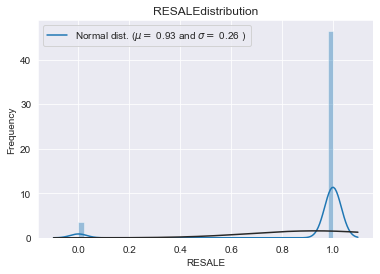

LONGITUDE

 mu = 21.30 and sigma = 6.21 and skew = 00.18 and kurt = 01.48



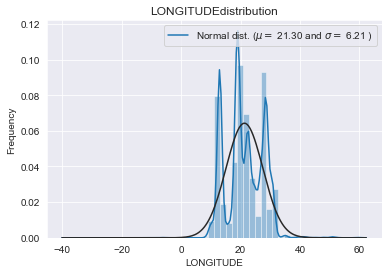

LATITUDE

 mu = 76.84 and sigma = 10.56 and skew = -10.32 and kurt = 166.65



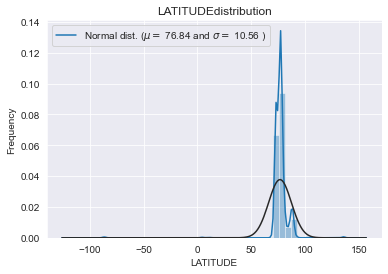

TARGET(PRICE_IN_LACS)

 mu = 142.90 and sigma = 656.87 and skew = 17.58 and kurt = 451.93



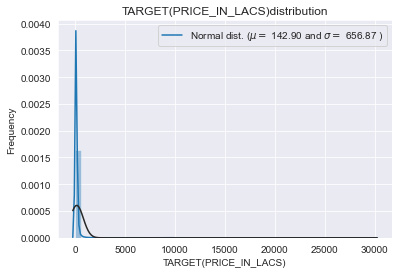

In [9]:
for column in train_df[numerical_feats].columns:
    print(column)
    getDistributionPlots(column)
    

In [10]:
#experimented with taking log of square_feet and target_value and handling outliers based on percentile, did not work well in experiments


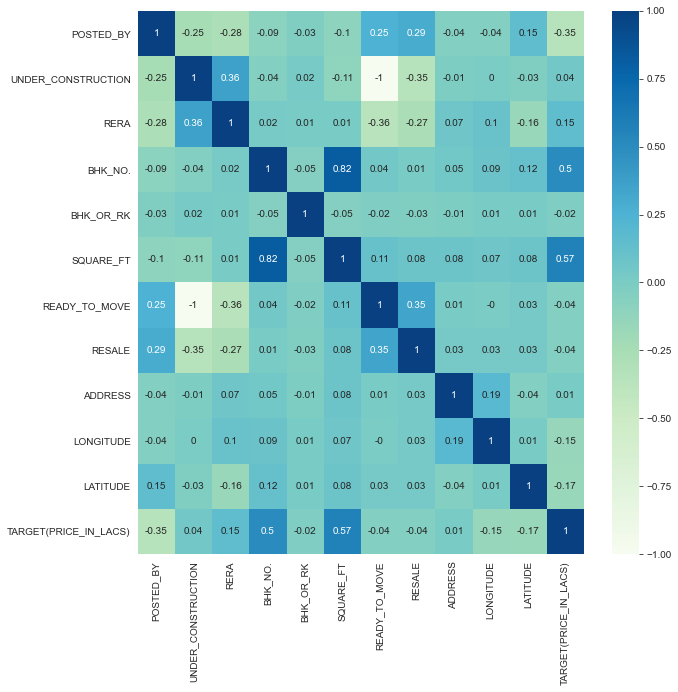

In [11]:
#Correlation analysis - label encode categorical for EDA and then generate heatmap

for i, feature in enumerate(categorical_feats):
    le = LabelEncoder()
    le.fit(train_df[feature])
    # transfrom training data
    train_df[feature] = le.transform(train_df[feature])
    columns = list(map(lambda x: feature+' '+str(x), list(le.classes_)))[1:]
    
plt.figure(figsize=(10, 10))
sns.heatmap(round(train_df.corr(method='spearman'), 2), annot=True,
            mask=None, cmap='GnBu')
plt.show()

#OBSERVATION: Sq feet and bhk_no closely related, UNDER_CONSTRUCTION is exactly same (inverse) of READY_TO_MOVE)

In [12]:
train_df.drop('READY_TO_MOVE', axis=1, inplace=True)
test_df.drop('READY_TO_MOVE', axis=1, inplace=True)

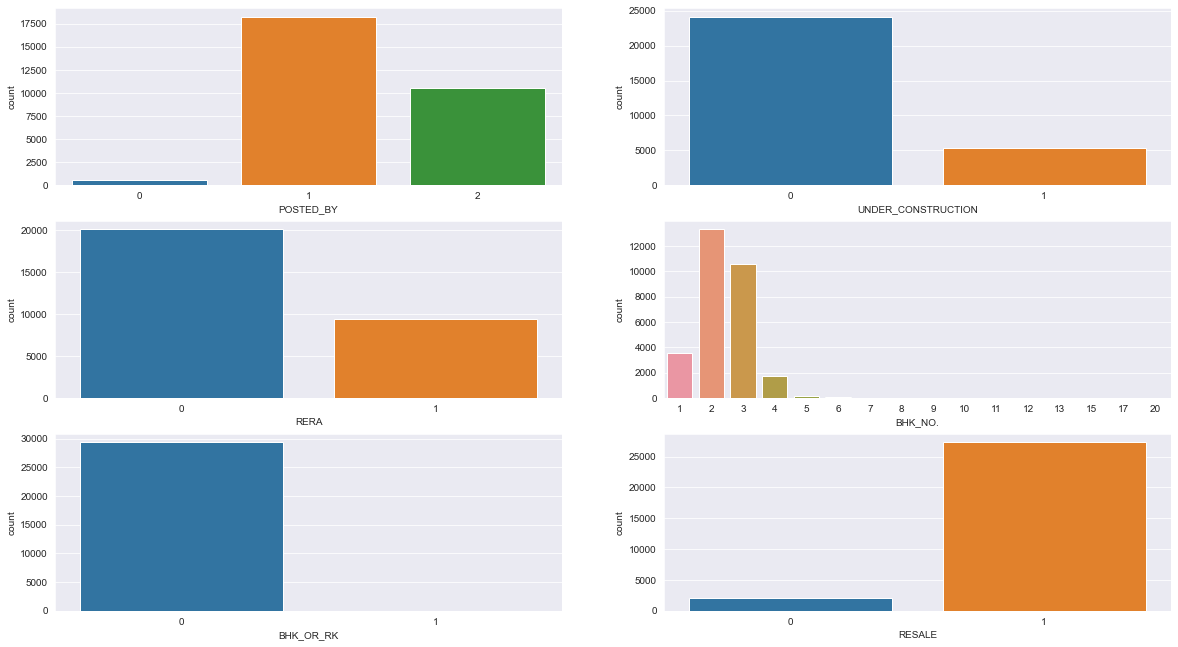

In [13]:
i=1
plt.figure(figsize=(20,15))
for col in ['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK', 'RESALE']: #categorical/distinct finite val cols freq analysis
    plt.subplot(4,2,i)
    sns.countplot(train_df[col])
    i+=1
#Observation: Data imbalance

In [14]:
#BASED ON DISTRIBUTION PLOTS, WE NEED TO ANALYZE SQUARE FEET AND TARGET PRICE
#FOR SQUARE FEET, WE HAVE 72 OBSERVATIONS OVER 100K SO WE THRESHOLD VALUES AND DROP OUTLIERS
bins = [0,1000,5000,10000,50000,100000,np.inf]
labels = ['less than 1K','1K-5K','5K-10K','10K-50K','50k-100K','100K+']
train_df['binned sq feet'] = pd.cut(train_df['SQUARE_FT'], bins=bins, labels=labels)
train_df.groupby(['binned sq feet']).agg(['mean', 'count'])

#WE ARE TAKING 100K AS THRESHOLD AND DROPPING OUTLIERS

POSTED_BY        UNDER_CONSTRUCTION        RERA        BHK_NO.  \
                    mean  count               mean  count mean  count    mean   
binned sq feet                                                                  
less than 1K        1.38  10100               0.24  10100 0.32  10100    1.71   
1K-5K               1.32  19022               0.15  19022 0.31  19022    2.73   
5K-10K              1.19    140               0.10    140 0.26    140    4.71   
10K-50K             1.37     57               0.23     57 0.40     57    4.09   
50k-100K            0.98     60               0.53     60 0.85     60    2.35   
100K+               0.97     72               0.51     72 0.57     72    3.00   

                      BHK_OR_RK         ... RESALE        ADDRESS         \
                count      mean  count  ...   mean  count    mean  count   
binned sq feet                          ...                                
less than 1K    10100      0.00  10100  ...   0.89  10100 3354.04  10100   
1K-5K           19022      0.00  19022  ...   0.96  19022 3647.76  19022   
5K-10K            140      0.00    140  ...   0.94    140 3550.46    140   
10K-50K            57      0.00     57  ...   0.67     57 3065.68     57   
50k-100K           60      0.00     60  ...   0.03     60 2681.03     60   
100K+              72      0.00     72  ...   0.17     72 4102.62     72   

               LONGITUDE        LATITUDE        TARGET(PRICE_IN_LACS)         
                    mean  count     mean  count                  mean  count  
binned sq feet                                                                
less than 1K       21.01  10100    76.44  10100                 55.18  10100  
1K-5K              21.47  19022    77.05  19022                120.38  19022  
5K-10K             20.89    140    76.74    140                967.84    140  
10K-50K            20.76     57    76.17     57               2604.27     57  
50k-100K           19.90     60    75.24     60               7957.75     60  
100K+              20.65     72    78.25     72               8331.70     72  

[6 rows x 22 columns]

In [15]:
#BASED ON DISTRIBUTION PLOTS, NOW WE ANALYZE TARGET PRICE OUTLIERS
bins = [0,10000,15000,20000,25000,30000]
labels = ['less than 10000','10000-15000','15000-20000','20000-250000','25000-30000']
train_df['binned sq feet'] = pd.cut(train_df['TARGET(PRICE_IN_LACS)'], bins=bins, labels=labels)
train_df.groupby(['binned sq feet']).agg(['mean', 'count'])

#WE WILL THRESHOLD ON 10K LAKHS BASED ON RESULTS TO DROP OUTLIERS

POSTED_BY        UNDER_CONSTRUCTION        RERA         \
                     mean  count               mean  count mean  count   
binned sq feet                                                           
less than 10000      1.34  29448               0.18  29448 0.32  29448   
10000-15000           NaN      0                NaN      0  NaN      0   
15000-20000           NaN      0                NaN      0  NaN      0   
20000-250000         2.00      1               0.00      1 0.00      1   
25000-30000          1.50      2               0.00      2 0.00      2   

                BHK_NO.        BHK_OR_RK         ... RESALE        ADDRESS  \
                   mean  count      mean  count  ...   mean  count    mean   
binned sq feet                                   ...                         
less than 10000    2.39  29448      0.00  29448  ...   0.93  29448 3544.59   
10000-15000         NaN      0       NaN      0  ...    NaN      0     NaN   
15000-20000         NaN      0       NaN      0  ...    NaN      0     NaN   
20000-250000       2.00      1      0.00      1  ...   1.00      1 2929.00   
25000-30000        3.00      2      0.00      2  ...   1.00      2 3780.50   

                       LONGITUDE        LATITUDE        TARGET(PRICE_IN_LACS)  \
                 count      mean  count     mean  count                  mean   
binned sq feet                                                                  
less than 10000  29448     21.30  29448    76.84  29448                140.09   
10000-15000          0       NaN      0      NaN      0                   NaN   
15000-20000          0       NaN      0      NaN      0                   NaN   
20000-250000         1     12.80      1    77.33      1              25000.00   
25000-30000          2     13.02      2    77.77      2              29000.00   

                        
                 count  
binned sq feet          
less than 10000  29448  
10000-15000          0  
15000-20000          0  
20000-250000         1  
25000-30000          2  

[5 rows x 22 columns]

In [16]:
train_df.groupby(['BHK_NO.']).agg(['mean', 'count'])
#BHK THRESHOLDING AT 6 (as very few observations exist after 8 number of rooms)

POSTED_BY        UNDER_CONSTRUCTION        RERA        BHK_OR_RK  \
             mean  count               mean  count mean  count      mean   
BHK_NO.                                                                    
1            1.35   3574               0.23   3574 0.33   3574      0.01   
2            1.39  13324               0.18  13324 0.30  13324      0.00   
3            1.30  10546               0.17  10546 0.33  10546      0.00   
4            1.17   1723               0.18   1723 0.38   1723      0.00   
5            1.23    190               0.06    190 0.21    190      0.00   
6            1.29     52               0.12     52 0.17     52      0.00   
7            1.55     11               0.09     11 0.18     11      0.00   
8            1.50     10               0.00     10 0.00     10      0.00   
9            2.00      3               0.33      3 0.00      3      0.00   
10           1.75      4               0.00      4 0.00      4      0.00   
11           2.00      1               0.00      1 0.00      1      0.00   
12           2.00      3               0.33      3 0.00      3      0.00   
13           1.00      1               0.00      1 0.00      1      0.00   
15           1.75      4               0.00      4 0.00      4      0.00   
17           2.00      1               0.00      1 0.00      1      0.00   
20           1.75      4               0.25      4 0.00      4      0.00   

               SQUARE_FT        RESALE        ADDRESS        LONGITUDE         \
         count      mean  count   mean  count    mean  count      mean  count   
BHK_NO.                                                                         
1         3574    873.82   3574   0.89   3574 3437.73   3574     20.94   3574   
2        13324   7434.65  13324   0.94  13324 3466.49  13324     20.80  13324   
3        10546  44806.03  10546   0.94  10546 3625.06  10546     21.82  10546   
4         1723   4155.81   1723   0.89   1723 3899.00   1723     22.68   1723   
5          190   4116.65    190   0.93    190 3470.13    190     22.47    190   
6           52   4477.37     52   0.98     52 3546.02     52     21.00     52   
7           11   8208.03     11   1.00     11 3030.09     11     21.19     11   
8           10   4297.33     10   1.00     10 3763.00     10     20.30     10   
9            3   4393.42      3   1.00      3 2983.00      3     19.13      3   
10           4  13959.19      4   1.00      4 2521.75      4     15.82      4   
11           1   4000.00      1   1.00      1 2168.00      1     28.86      1   
12           3   5256.30      3   1.00      3 2824.00      3     14.39      3   
13           1  10460.25      1   1.00      1  511.00      1     13.14      1   
15           4   7974.00      4   1.00      4 2475.50      4     17.07      4   
17           1  11000.34      1   1.00      1 2525.00      1     13.25      1   
20           4   9048.14      4   1.00      4 3137.00      4     18.11      4   

        LATITUDE        TARGET(PRICE_IN_LACS)         
            mean  count                  mean  count  
BHK_NO.                                               
1          74.97   3574                 72.56   3574  
2          76.87  13324                 97.18  13324  
3          77.46  10546                176.33  10546  
4          76.67   1723                350.82   1723  
5          76.40    190                604.19    190  
6          76.80     52                868.84     52  
7          77.67     11               1387.59     11  
8          76.30     10                727.00     10  
9          77.28      3                213.33      3  
10         80.65      4                263.96      4  
11         74.05      1                 55.00      1  
12         77.02      3                163.33      3  
13         77.67      1                500.00      1  
15         81.69      4                427.50      4  
17         80.16      1                320.00      1  
20         76.98      4          

In [17]:
train_df = train_df[(train_df['BHK_NO.']<=6)&(train_df['TARGET(PRICE_IN_LACS)']<10000)&(train_df['SQUARE_FT']<100000)]

In [18]:
train_df['BHK_OR_RK'].value_counts()

0    29313
1       24
Name: BHK_OR_RK, dtype: int64

In [19]:
train_df.drop(['ADDRESS', 'BHK_OR_RK','binned sq feet'], axis=1, inplace=True )
test_df.drop(['ADDRESS', 'BHK_OR_RK'], axis=1, inplace=True ) 

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29337 entries, 0 to 29450
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29337 non-null  int64  
 1   UNDER_CONSTRUCTION     29337 non-null  int64  
 2   RERA                   29337 non-null  int64  
 3   BHK_NO.                29337 non-null  int64  
 4   SQUARE_FT              29337 non-null  float64
 5   RESALE                 29337 non-null  int64  
 6   LONGITUDE              29337 non-null  float64
 7   LATITUDE               29337 non-null  float64
 8   TARGET(PRICE_IN_LACS)  29337 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 2.2 MB


In [21]:
#One hot encoding might work better- yet to test as it does not introduce ordinality
# enc = OneHotEncoder(handle_unknown='ignore')
# enc_df = pd.DataFrame(enc.fit_transform(train_df[['POSTED_BY']]).toarray(),columns=['POSTED_BY_BUILDER','POSTED_BY_DEALER','POSTED_BY_OWNER'])
# train_df = train_df.join(enc_df)

train_df['POSTED_BY']= train_df['POSTED_BY'].replace({'Owner':0, 'Dealer':1, 'Builder':2})
test_df['POSTED_BY']= test_df['POSTED_BY'].replace({'Owner':0, 'Dealer':1, 'Builder':2})

In [22]:
train_df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,2,0,0,2,1300.24,1,12.97,77.60,55.00
1,1,0,0,2,1275.00,1,12.27,76.64,51.00
2,2,0,0,2,933.16,1,12.78,77.63,43.00
3,2,0,1,2,929.92,1,28.64,77.34,62.50
4,1,1,0,2,999.01,1,22.59,88.48,60.50


In [23]:
X = train_df[train_df.columns.difference(['TARGET(PRICE_IN_LACS)','POSTED_BY'])]
y = train_df['TARGET(PRICE_IN_LACS)']

train, test = train_test_split(train_df,test_size=0.20, random_state=0, stratify=train_df[['RESALE', 'UNDER_CONSTRUCTION', 'RERA']])


X_train = train[train.columns.difference(['TARGET(PRICE_IN_LACS)'])]
y_train = train['TARGET(PRICE_IN_LACS)']

X_test = test[test.columns.difference(['TARGET(PRICE_IN_LACS)'])]
y_test = test['TARGET(PRICE_IN_LACS)']

print(X_train.shape)
print(X_test.shape)
X_train.head()


(23469, 8)
(5868, 8)


,BHK_NO.,LATITUDE,LONGITUDE,POSTED_BY,RERA,RESALE,SQUARE_FT,UNDER_CONSTRUCTION
20811,3,77.60,12.97,1,0,1,1350.21,0
818,3,102.14,19.89,2,0,1,1586.91,0
22619,2,78.42,24.69,1,0,1,1100.07,0
3979,3,75.81,26.85,2,0,1,1700.17,0
25072,3,80.16,13.08,1,0,1,1300.03,0


In [24]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

regressor = LinearRegression()
lrModel= regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 error:', metrics.r2_score(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

Mean Absolute Error: 67.51199702661162
Mean Squared Error: 36830.299779896966
Root Mean Squared Error: 191.91221894370605
R2 error: 0.7861331735968743


In [26]:
scores = cross_val_score(lrModel, X,y,cv=10, scoring='r2')
print(scores)

[0.78461474 0.73902198 0.86663273 0.83867492 0.73703838 0.61746861
 0.72687053 0.85800886 0.61793465 0.84910652]


In [27]:
def hyperparameterTuning(model,X,y,param_grid,folds,score):
    grid_search = GridSearchCV(model, param_grid, cv=folds,scoring=score,verbose=1,n_jobs=-1)
    grid_search.fit(X,y)
    return grid_search.best_estimator_ 

In [28]:
param_grid = [
    { 'max_depth':[25,30,35],'min_samples_split':[3,4],'criterion':["mae"],'splitter':[ "random"]},
  ]
decisionTreeRegressionModel=DecisionTreeRegressor(random_state=42)
decisionTreeRegressionTunedModel = hyperparameterTuning(decisionTreeRegressionModel,X,y,param_grid,5,'neg_mean_squared_error' )

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [29]:
param_grid = [
    {'n_estimators': [65,60,75],'max_depth':[30],'min_samples_split':[4]},
  ]

randomForestRegressorModel = RandomForestRegressor(n_jobs=-1,random_state=42)
randomForestRegressionTunedModel = hyperparameterTuning(randomForestRegressorModel,X,y,param_grid,5,'neg_mean_squared_error' )


Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [30]:
param_grid = [{'n_estimators':[250,300],'max_depth':[5],'reg_lambda':[1.0],'learning_rate':[0.01,0.05,0.1], 'gamma':[1],'reg_alpha':[1],'booster':['dart']}]
xgbModel = XGBRegressor(random_state=1,objective='reg:squarederror')

randomizedSearch= RandomizedSearchCV(xgbModel, param_grid, cv=5, verbose=5,
                           scoring='neg_mean_squared_error',random_state=1,n_iter=900,n_jobs=4)
randomizedSearch.fit(X,y)
xgbTunedModel=randomizedSearch.best_estimator_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [31]:
X_test

array([[0.2       , 0.70832946, 0.5833402 , ..., 1.        , 0.01159117,
        0.        ],
       [0.4       , 0.76529978, 0.61771736, ..., 0.        , 0.01902487,
        1.        ],
       [0.2       , 0.7234945 , 0.60140816, ..., 1.        , 0.01287142,
        0.        ],
       ...,
       [0.        , 0.70774742, 0.62458951, ..., 1.        , 0.00507889,
        0.        ],
       [0.4       , 0.70900134, 0.58107827, ..., 0.        , 0.01136539,
        1.        ],
       [0.4       , 0.72488548, 0.67901172, ..., 1.        , 0.01493656,
        0.        ]])

In [32]:
def predict(model, X_test):
    return model.predict(X_test)


def RMSE(y_test,y_pred):
    return np.sqrt(mean_squared_error(y_test,y_pred))


def R2(y_test,y_pred):
    return r2_score(y_test,y_pred)

def MSE(y_test,y_pred):
    return mean_squared_error(y_test, y_pred)


In [33]:
from sklearn.model_selection import cross_validate
import statistics

key= ['LR','DTR','RF','XGB' ]
value= [lrModel, decisionTreeRegressionModel, randomForestRegressionTunedModel, xgbTunedModel]
tunedModels= dict(zip(key,value))
results = []
scoring = {'r2': 'r2', 'neg_mean_squared_error':'neg_mean_squared_error'}
for key, value in tunedModels.items():
    scores = cross_validate(value, X,y,cv=10, scoring=scoring, return_train_score=True)
    results.append([statistics.mean(scores['train_r2']), statistics.mean(scores['test_r2']),np.sqrt(-1* statistics.mean(scores['train_neg_mean_squared_error'])), np.sqrt(-1 * statistics.mean(scores['test_neg_mean_squared_error']))])


In [34]:
result_df = pd.DataFrame(results, columns=['R2 Train','R2 Test','RMSE Train','RMSE Test'])
result_df.index = ['Linear Regression','Decision Tree Regression','Random Forest','XGBoost']
result_df 

,R2 Train,R2 Test,RMSE Train,RMSE Test
Linear Regression,0.78,0.76,210.82,211.19
Decision Tree Regression,1.00,0.89,3.98,141.70
Random Forest,0.99,0.93,52.43,115.90
XGBoost,0.98,0.94,64.26,108.37


In [ ]:
#DTR is overfitting, XGBoost tuned model is best in terms of R2 on 10 fold cross validated data, so we use it for prediction on test set
#Could potentially have used more search space for hyperparam tuning 

In [38]:
finalModel = xgbTunedModel.fit(X,y)
print(finalModel)
features = finalModel.get_booster().feature_names
predictions = finalModel.predict(test_df[features])
predicted_df = pd.DataFrame(predictions, columns=['TARGET(PRICE_IN_LACS)'])
predicted_df.to_csv('/Users/priyankaluthra/Desktop/housePriceKaggle/submission.csv', index=False)

XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=12, num_parallel_tree=1, random_state=1,
             reg_alpha=1, reg_lambda=1.0, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


In [41]:
clean_test_df = pd.read_csv(r"/Users/priyankaluthra/Desktop/housePriceKaggle/test.csv")
clean_test_df["TARGET(PRICE_IN_LACS)"]= predicted_df
clean_test_df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,1,BHK,545.17,1,1,"Kamrej,Surat",21.26,73.05,15.48
1,Dealer,1,1,2,BHK,800.00,0,0,"Panvel,Lalitpur",18.97,73.15,51.58
2,Dealer,0,0,2,BHK,1257.10,1,1,"New Town,Kolkata",22.59,88.48,54.01
3,Dealer,0,0,3,BHK,1400.33,1,1,"Kalwar Road,Jaipur",26.99,75.58,49.91
4,Owner,0,0,1,BHK,430.48,1,1,"Mai Mandir,Nadiad",22.70,72.87,9.79
...,...,...,...,...,...,...,...,...,...,...,...,...
68715,Dealer,0,1,2,BHK,856.56,1,1,"Thane West,Maharashtra",19.18,72.96,125.27
68716,Dealer,0,1,3,BHK,2304.15,1,1,"Sector-66A Mohali,Mohali",30.66,76.75,106.14
68717,Dealer,1,1,1,BHK,33362.79,0,0,"Balkum,Maharashtra",19.22,72.99,8762.02
68718,Dealer,0,0,2,BHK,1173.71,1,1,"Hadapsar,Pune",18.50,73.94,77.84
